In [3]:
from pandas.api.types import CategoricalDtype
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
df = pd.read_csv('../../data/processed/sleep_cycle_productivity_cleaned.csv')

In [5]:
ordered_score = CategoricalDtype(categories=list(range(1, 11)), ordered=True)

df['Sleep Quality'] = df['Sleep Quality'].astype(ordered_score)
df['Productivity Score'] = df['Productivity Score'].astype(ordered_score)
df['Mood Score'] = df['Mood Score'].astype(ordered_score)
df['Stress Level'] = df['Stress Level'].astype(ordered_score)

df['Weekday'] = df['Weekday'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [6]:
df['Sleep Quality'] = df['Sleep Quality'].apply(lambda x: 0 if x <= 5 else 1)

In [7]:
df.head(5)

,Date,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Weekday
0,2024-04-12,30,2,23.33,4.61,5.28,0,86,116,8.808920,8,3,6,Friday
1,2024-11-04,40,0,21.02,2.43,5.41,0,32,88,6.329833,10,3,7,Monday
2,2024-08-31,20,1,22.10,3.45,5.35,1,17,59,8.506306,10,9,10,Saturday
3,2024-02-22,30,2,23.10,6.65,7.55,1,46,80,6.070240,8,4,2,Thursday
4,2024-02-23,40,2,21.42,4.17,6.75,1,61,94,11.374994,8,7,9,Friday


In [8]:
nominal_cols = ['Gender', 'Weekday']

results = []

for col in nominal_cols:
    contingency_table = pd.crosstab(df['Sleep Quality'], df[col])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    results.append((col, chi2, p))

for col, chi2_stat, p_val in results:
    print(f'{col} - Chi-square test: chi2 statistic={chi2_stat:.4f}, p-value={p_val:.4f}')


Gender - Chi-square test: chi2 statistic=1.9418, p-value=0.3787
Weekday - Chi-square test: chi2 statistic=1.8411, p-value=0.9337


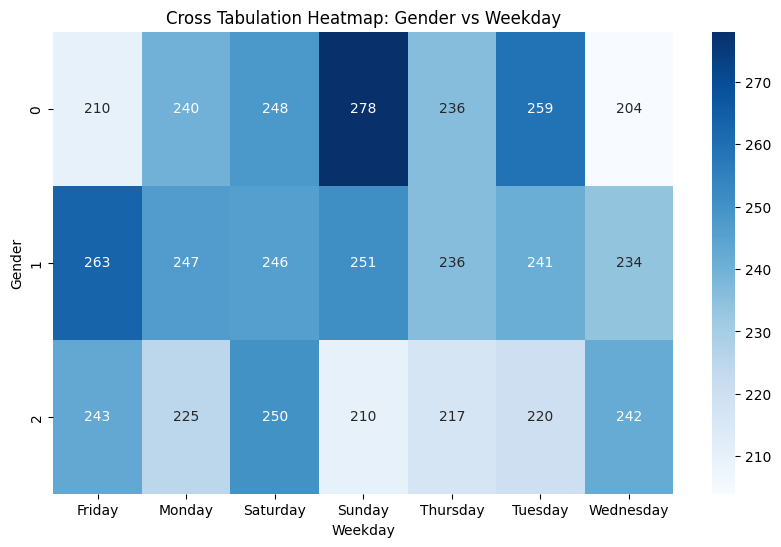

In [9]:
cross_tab = pd.crosstab(df['Gender'], df['Weekday'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross Tabulation Heatmap: Gender vs Weekday')
plt.xlabel('Weekday')
plt.ylabel('Gender')
plt.show()

<Figure size 1000x600 with 0 Axes>

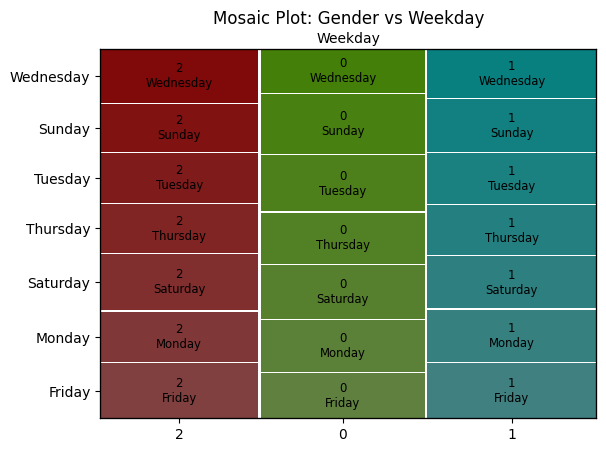

In [10]:
plt.figure(figsize=(10, 6))
mosaic(df, ['Gender', 'Weekday'])
plt.title('Mosaic Plot: Gender vs Weekday')
plt.xlabel('Weekday')
plt.ylabel('Gender')
plt.show()